<a href="https://colab.research.google.com/github/DecianyMoura/metricas-de-avalicao-de-aprendizado/blob/main/Metricasdeavaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Bibliotecas
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [33]:
# Carregando dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [34]:
# Normalizando os dados
x_train, x_test = x_train / 255.0, x_test / 255.0

In [35]:
# Seleção das amostras
x_train_small, y_train_small = [], []
x_test_small, y_test_small = [], []

for digito in range(10):
    idx_train = np.where(y_train == digito)[0][:10]
    idx_test = np.where(y_test == digito)[0][:10]
    x_train_small.append(x_train[idx_train])
    y_train_small.append(y_train[idx_train])
    x_test_small.append(x_test[idx_test])
    y_test_small.append(y_test[idx_test])

x_train_small = np.vstack(x_train_small)
y_train_small = np.hstack(y_train_small)
x_test_small = np.vstack(x_test_small)
y_test_small = np.hstack(y_test_small)


In [37]:
# Adaptação das amostras
x_train_flat = x_train_small.reshape((-1, 28*28))
x_test_flat = x_test_small.reshape((-1, 28*28))

In [ ]:
# Criação do modelo
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(28*28,)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train_small, epochs=20, validation_data=(x_test_flat, y_test_small), verbose=1)


In [ ]:
# Fazendo predições
y_pred_probs = model.predict(x_test_flat)
y_pred = np.argmax(y_pred_probs, axis=1)

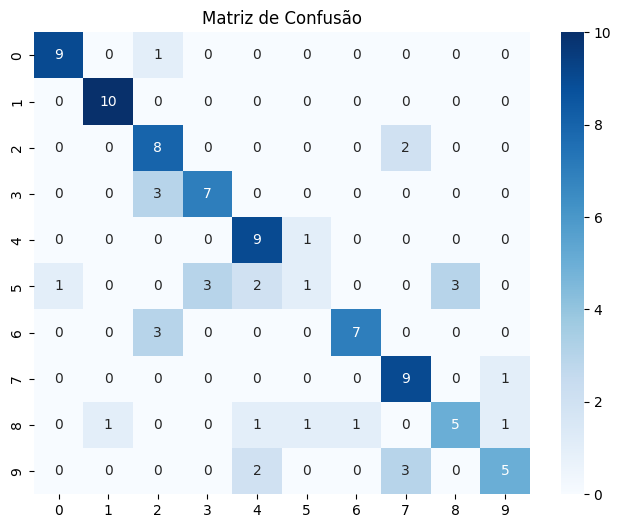

In [45]:
# Construção da Matriz de confusão
num_classes = 10
cm = np.zeros((num_classes, num_classes), dtype=int)

for true, pred in zip(y_test_small, y_pred):
    cm[true, pred] += 1

cm_df = pd.DataFrame(cm, index=range(num_classes), columns=range(num_classes))

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()

In [46]:
# Calculando as métricas
VP = np.diag(cm)
FP = cm.sum(axis=0) - VP
FN = cm.sum(axis=1) - VP
VN = cm.sum() - (VP + FP + FN)

In [47]:
# Precisão, Recall, F1 e Especificidade por classe
precisao = VP / (VP + FP + 1e-10)
recall = VP / (VP + FN + 1e-10)
f1 = 2 * precisao * recall / (precisao + recall + 1e-10) # 1e-10 para evitar divisão por zero
especificidade = VN / (VN + FP + 1e-10)

In [48]:
# Média macro
df_resultados = pd.DataFrame({
    "Acurácia": [VP.sum()/cm.sum()],
    "Precisão (macro)": [precisao.mean()],
    "Recall (macro)": [recall.mean()],
    "F1-Score (macro)": [f1.mean()],
    "Especificidade (macro)": [especificidade.mean()]
}).round(4)

print("Resultados das métricas:")
display(df_resultados)


Resultados das métricas:


,Acurácia,Precisão (macro),Recall (macro),F1-Score (macro),Especificidade (macro)
0,0.7,0.6876,0.7,0.6768,0.9667
